Birth Rate Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('births.csv')
data

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


In [3]:
data.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [4]:
data = pd.read_csv("births.csv") 
data.head()
data['day'].fillna(0, inplace=True) 
data['day'] = data['day'].astype(int)
data.head()

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548


In [5]:
data['decade'] = 10 * (data['year'] // 10)
data.pivot_table('births', index = 'decade', columns = 'gender', aggfunc = 'sum')
data

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960
1,1969,1,1,M,4440,1960
2,1969,1,2,F,4454,1960
3,1969,1,2,M,4548,1960
4,1969,1,3,F,4548,1960
...,...,...,...,...,...,...
15542,2008,10,0,M,183219,2000
15543,2008,11,0,F,158939,2000
15544,2008,11,0,M,165468,2000
15545,2008,12,0,F,173215,2000


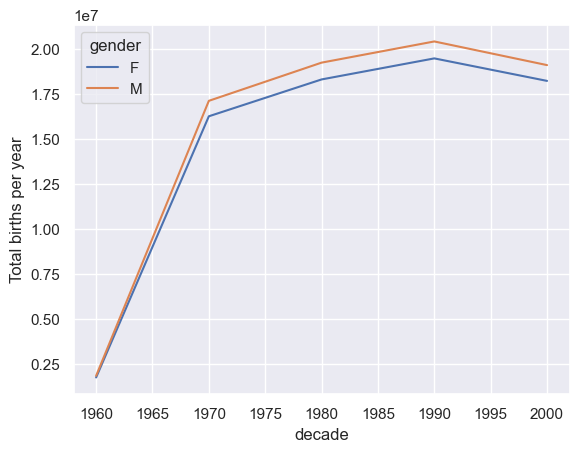

In [6]:
import seaborn as sns 
sns.set()
decade = data.pivot_table('births', index = 'decade', columns = 'gender', aggfunc = 'sum')
decade.plot()
plt.ylabel("Total births per year")
plt.show()

In [13]:
import numpy as np
quartile = np.percentile(data['births'], [25, 50, 75])
mu = quartile[1]
sig = 0.74 * (quartile[2] - quartile[0])
quartile

array([4358. , 4814. , 5289.5])

In [22]:
data = data.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
data['day'] = data['day'].astype(int)
data.index = pd.to_datetime(10000 * data.year + 
                            100 * data.month + 
                            data.day, 
                            format = '%Y%m%d')
data['Day of week'] = data.index.dayofweek
data

,year,month,day,gender,births,decade,Day of week
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4
...,...,...,...,...,...,...,...
1988-12-29,1988,12,29,M,5944,1980,3
1988-12-30,1988,12,30,F,5742,1980,4
1988-12-30,1988,12,30,M,6095,1980,4
1988-12-31,1988,12,31,F,4435,1980,5


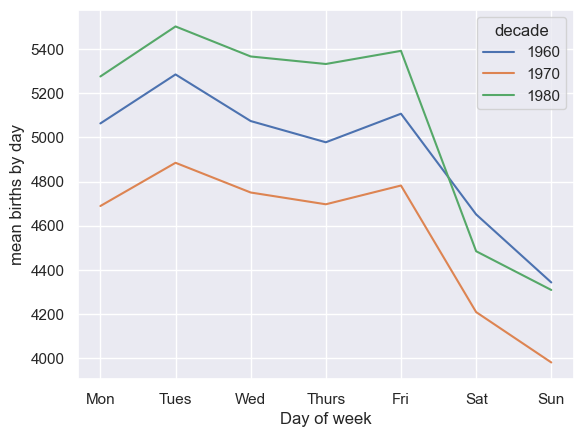

In [45]:
data.pivot_table('births', index = 'Day of week', columns='decade', aggfunc='mean').plot()
plt.gca().set_xticks(range(7))
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');
plt.show()

In [57]:
!pip install --upgrade pandas

In [68]:
import pandas as pd
births_month = data.pivot_table('births',[data.index.month, data.index.day])
births_month.head()

births_month.index = [pd.Timestamp(2012, month, day)
                      for (month,day) in births_month.index]
births_month.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


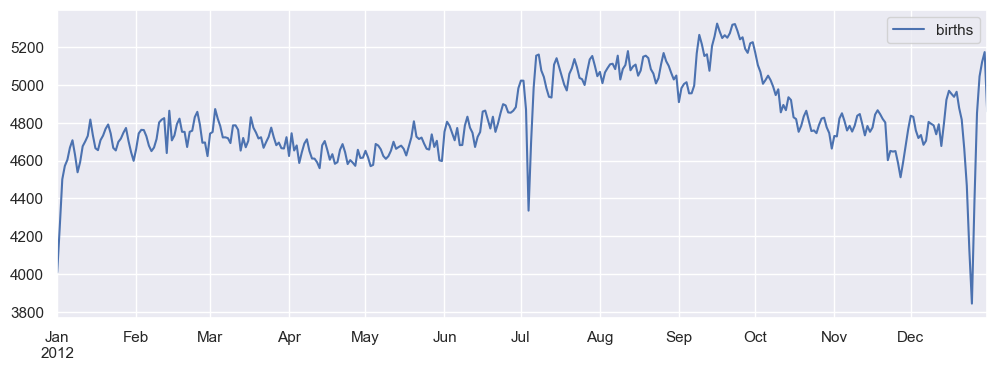

In [70]:
fig, ax = plt.subplots(figsize=(12,4))
births_month.plot(ax=ax)
plt.show()